# 1. Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up basic configs
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_theme(style="whitegrid")

# Loading dataset
file_path = "/Users/pinargokhan/Desktop/Pusula_Pinar_Gokhan/data/Talent_Academy_Case_DT_2025.csv"

df = pd.read_csv(file_path, sep=";", encoding="utf-8-sig")

print("Data shape:", df.shape)
display(df.head())


Data shape: (2235, 13)


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


# 2. Extracting numeric values from text fields


In [2]:
# Extracting first numeric value from strings 
def extract_first_number(s):
    if pd.isna(s):
        return np.nan
    
    m = re.search(r"\d+([.,]\d+)?", str(s))
    return float(m.group(0).replace(",", ".")) if m else np.nan


# Converting text durations into numeric columns
for col, new_col in [("TedaviSuresi", "TedaviSuresi_num"),
                     ("UygulamaSuresi", "UygulamaSuresi_num")]:
    if col in df.columns:
        df[new_col] = df[col].apply(extract_first_number)
        

print("Preview after numeric conversion:")
display(df[["TedaviSuresi", "TedaviSuresi_num", "UygulamaSuresi", "UygulamaSuresi_num"]].head())


Preview after numeric conversion:


,TedaviSuresi,TedaviSuresi_num,UygulamaSuresi,UygulamaSuresi_num
0,5 Seans,5.0,20 Dakika,20.0
1,15 Seans,15.0,20 Dakika,20.0
2,15 Seans,15.0,20 Dakika,20.0
3,15 Seans,15.0,5 Dakika,5.0
4,15 Seans,15.0,20 Dakika,20.0


# 3. Visualizing distributions of durations

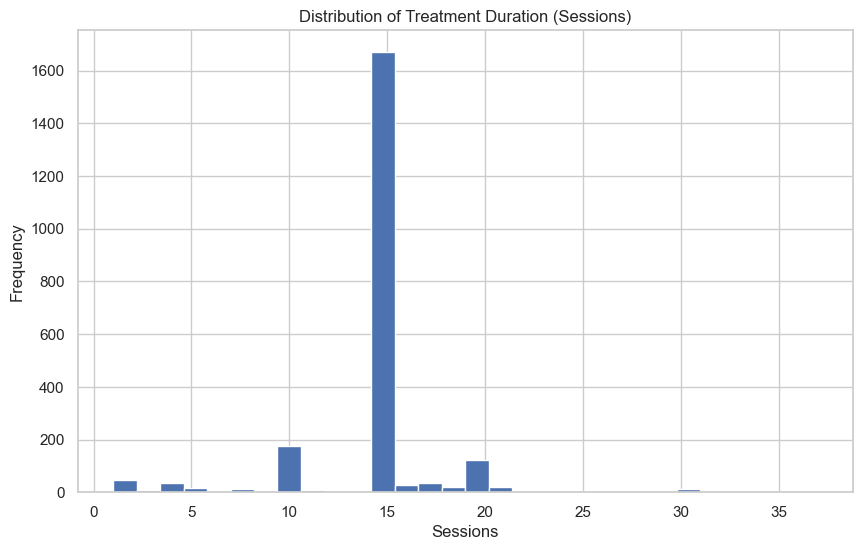

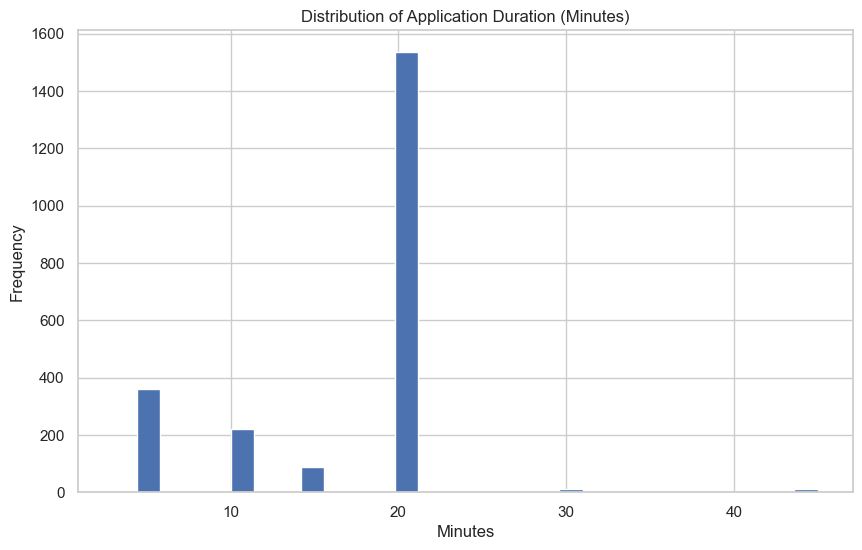

In [3]:
# Distribution of treatment duration (sessions)
if "TedaviSuresi_num" in df.columns:
    df["TedaviSuresi_num"].dropna().hist(bins=30)
    plt.title("Distribution of Treatment Duration (Sessions)")
    plt.xlabel("Sessions")
    plt.ylabel("Frequency")
    plt.show()

# Distribution of application duration (minutes)
if "UygulamaSuresi_num" in df.columns:
    df["UygulamaSuresi_num"].dropna().hist(bins=30)
    plt.title("Distribution of Application Duration (Minutes)")
    plt.xlabel("Minutes")
    plt.ylabel("Frequency")
    plt.show()



# 4. Cleaning and normalizing text columns

In [4]:
# Cleaning text: trimming spaces and normalizing whitespace
def clean_text(s):
    if pd.isna(s):
        return s
    s = str(s).strip()
    s = re.sub(r"\s+", " ", s)
    return s

# Applying cleaning to selected text columns

text_cols = ["Cinsiyet", "KanGrubu", "Uyruk", "Bolum", "TedaviAdi",
             "KronikHastalik", "Alerji", "Tanilar", "UygulamaYerleri"]

for c in text_cols:
    if c in df.columns:
        df[c] = df[c].apply(clean_text)

print("Preview after cleaning text columns:")
display(df[text_cols].head(3))



Preview after cleaning text columns:


,Cinsiyet,KanGrubu,Uyruk,Bolum,TedaviAdi,KronikHastalik,Alerji,Tanilar,UygulamaYerleri
0,Kadın,0 Rh+,Türkiye,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Ayak Bileği,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği
1,Erkek,0 Rh+,Türkiye,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Dorsalji -Boyun+trapez+skapular,"Duchenne Musküler Distrofisi, Myastenia gravis...",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Boyun
2,Erkek,0 Rh+,Türkiye,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Dorsalji -Boyun+trapez+skapular,"Duchenne Musküler Distrofisi, Myastenia gravis...",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...","Boyun,Sırt"


# 5. Standardizing gender and blood group

In [5]:
# Standardizing gender values

if "Cinsiyet" in df.columns:
    map_cins = {"Kadın": "Kadin", "KADIN": "Kadin", "Erkek": "Erkek", "ERKEK": "Erkek"}
    df["Cinsiyet"] = df["Cinsiyet"].replace(map_cins)

# Standardizing blood group notation

if "KanGrubu" in df.columns:
    df["KanGrubu"] = df["KanGrubu"].str.replace(r"^0", "O", regex=True)
    df["KanGrubu"] = df["KanGrubu"].str.replace(r"\s+", " ", regex=True)

print("Preview after standardizing gender and blood group:")
display(df[["Cinsiyet", "KanGrubu"]].head(5))


Preview after standardizing gender and blood group:


,Cinsiyet,KanGrubu
0,Kadin,O Rh+
1,Erkek,O Rh+
2,Erkek,O Rh+
3,Erkek,O Rh+
4,Erkek,O Rh+


# 6. Extracting primary department

In [6]:
# Extracting primary department, taking the first if multiple are listed

if "Bolum" in df.columns:
    df["Bolum_Primary"] = df["Bolum"].apply(lambda x: str(x).split(",")[0].strip() if pd.notna(x) else x)

print("Preview after extracting primary department:")
display(df[["Bolum", "Bolum_Primary", "TedaviAdi", "Uyruk"]].head())

Preview after extracting primary department:


,Bolum,Bolum_Primary,TedaviAdi,Uyruk
0,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Fiziksel Tıp Ve Rehabilitasyon,Ayak Bileği,Türkiye
1,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Fiziksel Tıp Ve Rehabilitasyon,Dorsalji -Boyun+trapez+skapular,Türkiye
2,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Fiziksel Tıp Ve Rehabilitasyon,Dorsalji -Boyun+trapez+skapular,Türkiye
3,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Fiziksel Tıp Ve Rehabilitasyon,Dorsalji -Boyun+trapez+skapular,Türkiye
4,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Fiziksel Tıp Ve Rehabilitasyon,Dorsalji -Boyun+trapez+skapular,Türkiye


# 7. Splitting multi-valued fields and counting items

In [7]:
# Splitting multi-valued fields into lists and creating count columns

multi_cols = ["KronikHastalik", "Alerji", "Tanilar", "UygulamaYerleri"]

def split_list(s):
    if pd.isna(s):
        return []
    parts = re.split(r"[;,]+", str(s).replace("​", ""))
    return [clean_text(p) for p in parts if clean_text(p)]

for c in multi_cols:
    if c in df.columns:
        lst_col = f"{c}_list"
        df[lst_col] = df[c].apply(split_list)
        df[f"{c}_count"] = df[lst_col].apply(len)

print("Preview of count columns for multi-valued fields:")
display(df[[f"{c}_count" for c in multi_cols]].head())

Preview of count columns for multi-valued fields:


,KronikHastalik_count,Alerji_count,Tanilar_count,UygulamaYerleri_count
0,3,1,1,1
1,4,0,4,1
2,4,0,4,2
3,4,0,4,1
4,4,0,4,2


# 8. Creating multi-hot encoded features

In [8]:
from collections import Counter
TOP_N = 15

# Creating multi-hot encoded columns for top frequent items

for c in multi_cols:
    lst_col = f"{c}_list"
    if lst_col in df.columns:
        all_items = Counter([item for sub in df[lst_col] for item in sub])
        top_items = [w for w, _ in all_items.most_common(TOP_N)]
        for item in top_items:
            safe_name = re.sub(r"[^A-Za-z0-9_]+", "_", item)[:30]
            df[f"{c}__{safe_name}"] = df[lst_col].apply(lambda L: int(item in L))

cols_preview = [col for col in df.columns if "__" in col]

print("Number of created multi-hot columns:", len(cols_preview))
display(df[[*cols_preview[:8]]].head())

Number of created multi-hot columns: 60


,KronikHastalik__Aritmi,KronikHastalik__Hiportiroidizm,KronikHastalik__Limb_Girdle_Musk_ler_Distrofi,KronikHastalik__Ast_m,KronikHastalik__Hipertiroidizm,KronikHastalik__Myastenia_gravis,KronikHastalik__Diyabet,KronikHastalik__Duchenne_Musk_ler_Distrofisi
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1
2,0,0,0,0,0,1,0,1
3,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,1


# 9. Handling missing values with imputation

In [9]:
from sklearn.impute import SimpleImputer

df_clean = df.copy()

# Identifying numeric, categorical, and list-like columns

num_cols = [c for c in df_clean.columns if pd.api.types.is_numeric_dtype(df_clean[c])]
obj_cols = [c for c in df_clean.columns if pd.api.types.is_object_dtype(df_clean[c])]

list_cols = []
for c in obj_cols:
    if df_clean[c].apply(lambda v: isinstance(v, list)).any():
        list_cols.append(c)

cat_primitive_cols = [c for c in obj_cols if c not in list_cols]

print("Sample of numeric cols:", num_cols[:8])
print("Sample of primitive categorical cols:", cat_primitive_cols[:8])
print("List-like cols:", list_cols)

# Imputing missing values

if num_cols:
    num_imputer = SimpleImputer(strategy="median")
    df_clean[num_cols] = num_imputer.fit_transform(df_clean[num_cols])

if cat_primitive_cols:
    cat_imputer = SimpleImputer(strategy="most_frequent")
    df_clean[cat_primitive_cols] = cat_imputer.fit_transform(df_clean[cat_primitive_cols])

# Handling list-like columns

for c in list_cols:
    df_clean[c] = df_clean[c].apply(lambda x: x if isinstance(x, list) else ([] if pd.isna(x) else [str(x)]))

print("Shape after imputation:", df_clean.shape)
print("Total NaN left:", int(df_clean.isna().sum().sum()))


Sample of numeric cols: ['HastaNo', 'Yas', 'TedaviSuresi_num', 'UygulamaSuresi_num', 'KronikHastalik_count', 'Alerji_count', 'Tanilar_count', 'UygulamaYerleri_count']
Sample of primitive categorical cols: ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi']
List-like cols: ['KronikHastalik_list', 'Alerji_list', 'Tanilar_list', 'UygulamaYerleri_list']
Shape after imputation: (2235, 84)
Total NaN left: 0


# 10. Dealing with outliers (IQR capping)

In [10]:
# Capping outliers with IQR method

def iqr_cap(series, k=1.5):
    s = series.copy()
    q1, q3 = np.nanpercentile(s, [25, 75])
    iqr = q3 - q1
    lo, hi = q1 - k * iqr, q3 + k * iqr
    return s.clip(lower=lo, upper=hi)

for c in ["TedaviSuresi_num", "UygulamaSuresi_num", "Yas"]:
    if c in df_clean.columns and pd.api.types.is_numeric_dtype(df_clean[c]):
        before = df_clean[c].describe()
        df_clean[c] = iqr_cap(df_clean[c], k=1.5)
        after = df_clean[c].describe()
        print(f"\n{c} before vs after IQR capping:")
        display(pd.DataFrame({"before": before, "after": after}))



TedaviSuresi_num before vs after IQR capping:


,before,after
count,2235.000000,2235.0
mean,14.570917,15.0
std,3.725322,0.0
min,1.000000,15.0
25%,15.000000,15.0
50%,15.000000,15.0
75%,15.000000,15.0
max,37.000000,15.0



UygulamaSuresi_num before vs after IQR capping:


,before,after
count,2235.000000,2235.000000
mean,16.573154,16.523937
std,6.268635,6.083479
min,3.000000,3.000000
25%,10.000000,10.000000
50%,20.000000,20.000000
75%,20.000000,20.000000
max,45.000000,35.000000



Yas before vs after IQR capping:


,before,after
count,2235.000000,2235.000000
mean,47.327069,47.328412
std,15.208634,14.886544
min,2.000000,11.000000
25%,38.000000,38.000000
50%,46.000000,46.000000
75%,56.000000,56.000000
max,92.000000,83.000000


# 11. Checking duplicates and saving a clean dataset

In [11]:
# Checking that numeric duration columns exist in `df` and are carried into `df_clean`

# Defining helper only if it's not already available

if "extract_first_number" not in globals():
    import re, numpy as np, pandas as pd
    def extract_first_number(s):
        if pd.isna(s):
            return np.nan
        m = re.search(r"\d+([.,]\d+)?", str(s))
        return float(m.group(0).replace(",", ".")) if m else np.nan

# Creating numeric duration columns on `df` if missing

created = []
if "TedaviSuresi_num" not in df.columns and "TedaviSuresi" in df.columns:
    df["TedaviSuresi_num"] = df["TedaviSuresi"].apply(extract_first_number)
    created.append("TedaviSuresi_num")

if "UygulamaSuresi_num" not in df.columns and "UygulamaSuresi" in df.columns:
    df["UygulamaSuresi_num"] = df["UygulamaSuresi"].apply(extract_first_number)
    created.append("UygulamaSuresi_num")

if created:
    print("Added numeric duration columns on df:", created)
else:
    print("Numeric duration columns already present on df.")

# Aligning `df_clean` with `df` when needed

if "df_clean" not in globals():
    df_clean = df.copy()
    print("Initialized df_clean from df.")
elif any(col not in df_clean.columns for col in ["TedaviSuresi_num", "UygulamaSuresi_num"]):
    df_clean = df.copy()
    print("Aligned df_clean with df to include numeric duration columns.")
else:
    print("df_clean is up to date.")


Numeric duration columns already present on df.
df_clean is up to date.


# 12. Preparing features for modeling

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from packaging import version
import sklearn

print("sklearn version:", sklearn.__version__)

# Defining key columns
id_col = "HastaNo"
target = "TedaviSuresi_num"
assert target in df_clean.columns, "TedaviSuresi_num is missing. Make sure numeric durations were created earlier."

# Picking candidate categorical features
cand_cat = ["Cinsiyet", "KanGrubu", "Uyruk", "Bolum_Primary", "TedaviAdi"]
cat_cols = [c for c in cand_cat if c in df_clean.columns and pd.api.types.is_object_dtype(df_clean[c])]

# Picking numeric features (base numerics + engineered multi-hot/counts)
base_num = [c for c in ["Yas", "UygulamaSuresi_num"] if c in df_clean.columns]
multi_numeric = [c for c in df_clean.columns
                 if (("__" in c) or c.endswith("_count")) and pd.api.types.is_numeric_dtype(df_clean[c])]

# Building final feature list (excluding ID and target)
feature_cols = base_num + multi_numeric + cat_cols
feature_cols = [c for c in feature_cols if c not in [id_col, target]]

print("Base numeric to scale (sample):", base_num[:10])
print("Multi-hot / count numeric (sample):", multi_numeric[:10])
print("Categorical features:", cat_cols)
print("Total number of features:", len(feature_cols))


sklearn version: 1.2.1
Base numeric to scale (sample): ['Yas', 'UygulamaSuresi_num']
Multi-hot / count numeric (sample): ['KronikHastalik_count', 'Alerji_count', 'Tanilar_count', 'UygulamaYerleri_count', 'KronikHastalik__Aritmi', 'KronikHastalik__Hiportiroidizm', 'KronikHastalik__Limb_Girdle_Musk_ler_Distrofi', 'KronikHastalik__Ast_m', 'KronikHastalik__Hipertiroidizm', 'KronikHastalik__Myastenia_gravis']
Categorical features: ['Cinsiyet', 'KanGrubu', 'Uyruk', 'Bolum_Primary', 'TedaviAdi']
Total number of features: 71


# 13. Building preprocessing pipeline (scaling + encoding)

In [13]:
# Setting OneHotEncoder kwargs based on sklearn version

ohe_kwargs = dict(handle_unknown="ignore")
if version.parse(sklearn.__version__) >= version.parse("1.2"):
    ohe_kwargs["sparse_output"] = False
else:
    ohe_kwargs["sparse"] = False

# Collecting numeric features to scale

numeric_to_scale = base_num + multi_numeric

# Defining the preprocessing pipeline 

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_to_scale),
        ("cat", OneHotEncoder(**ohe_kwargs), cat_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

pipe = Pipeline(steps=[("pre", preprocessor)])


X = pipe.fit_transform(df_clean[feature_cols])
print("Transformed matrix shape:", X.shape)

num_names = numeric_to_scale
cat_names = []
if cat_cols:
    enc = pipe.named_steps["pre"].named_transformers_["cat"]
    cat_names = list(enc.get_feature_names_out(cat_cols))

feature_names = list(num_names) + cat_names
print("Number of features:", len(feature_names))


Transformed matrix shape: (2235, 334)
Number of features: 334


# 14. Creating the final model-ready matrix

In [14]:
# Grabbing target and ID columns

y = df_clean[target].values
ids = df_clean[id_col].values if id_col in df_clean.columns else np.arange(len(df_clean))

# Putting everything together into the final DataFrame
X_df = pd.DataFrame(X, columns=feature_names, index=df_clean.index)

model_ready_df = pd.concat([
    pd.Series(ids, name=id_col, index=df_clean.index),
    pd.Series(y,   name=target,  index=df_clean.index),
    X_df
], axis=1)

print("Here’s the final model-ready DataFrame shape:", model_ready_df.shape)
display(model_ready_df.head())

# Saving outputs (CSV & Parquet)
out_csv  = "/Users/pinargokhan/Desktop/Pusula_Pinar_Gokhan/data/model_matrix.csv"
out_parq = "/Users/pinargokhan/Desktop/Pusula_Pinar_Gokhan/data/model_matrix.parquet"

model_ready_df.to_csv(out_csv, index=False, encoding="utf-8-sig")
try:
    model_ready_df.to_parquet(out_parq, index=False)
    print(" Saved both CSV and Parquet files:")
    print(" -", out_csv)
    print(" -", out_parq)
except Exception as e:
    print(" Couldn’t save as Parquet, but CSV is fine:", e)
    print("CSV file is available here:", out_csv)


Here’s the final model-ready DataFrame shape: (2235, 336)


,HastaNo,TedaviSuresi_num,Yas,UygulamaSuresi_num,KronikHastalik_count,Alerji_count,Tanilar_count,UygulamaYerleri_count,KronikHastalik__Aritmi,KronikHastalik__Hiportiroidizm,...,TedaviAdi_Çapraz bağ lezyonu,TedaviAdi_Ön çapraz bağ rehabilitasyonu,TedaviAdi_ÖÇB,TedaviAdi_İV Disk Boyun,TedaviAdi_İV DİSK BOZUKLUĞU-BEL,TedaviAdi_İV DİSK BOZUKLUĞU-BEL-1,TedaviAdi_İV DİSK BOZUKLUĞU-BEL-2,TedaviAdi_İmpimgement send,TedaviAdi_İmpingement Sağ,TedaviAdi_İmpingement op izometrik
0,145134.0,15.0,0.851401,0.571522,0.753048,0.400758,-0.897180,0.184079,-0.463329,2.198979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,145135.0,15.0,-1.298672,0.571522,1.419607,-1.032353,0.895843,0.184079,-0.463329,-0.454756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,145135.0,15.0,-1.298672,0.571522,1.419607,-1.032353,0.895843,2.982827,-0.463329,-0.454756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,145135.0,15.0,-1.298672,-1.894724,1.419607,-1.032353,0.895843,0.184079,-0.463329,-0.454756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,145135.0,15.0,-1.298672,0.571522,1.419607,-1.032353,0.895843,2.982827,-0.463329,-0.454756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 Saved both CSV and Parquet files:
 - /Users/pinargokhan/Desktop/Pusula_Pinar_Gokhan/data/model_matrix.csv
 - /Users/pinargokhan/Desktop/Pusula_Pinar_Gokhan/data/model_matrix.parquet


# 15. Final checks on features and target

In [15]:
# Double-checking that all features are numeric

assert all(pd.api.types.is_numeric_dtype(model_ready_df[c]) for c in model_ready_df.columns if c != id_col), \
       "There are still non-numeric columns left!"

# Checking if target has any missing values

missing_y = model_ready_df[target].isna().sum()
print("Missing values in target:", missing_y)

# Spotting very rare one-hot encoded columns

sparse_cols = (X_df.sum(axis=0) <= 3)
print("Number of very rare OHE columns:", int(sparse_cols.sum()))



Missing values in target: 0
Number of very rare OHE columns: 137
